# 2019 Bay Wheels' Trip Data Exploration and Visualization

## Table of Contents
- [Preliminary Wrangling](#wrangle)
- [Cleaning](#clean)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)

<a id='wrangle'></a>
## Preliminary Wrangling

This document explores a dataset containing [information](https://www.lyft.com/bikes/bay-wheels/system-data) about individual rides made in [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels)' bike-sharing system covering the greater San Francisco Bay area.  The dataset is data from January 2019 and can be manually downloaded [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [2]:
# import all packages and set plots to be embedded inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201901-fordgobike-tripdata.csv')

In [4]:
# high level overview of data shape and composition
print(df.shape)
print(df.dtypes)
# i prefer looking at it through this instead of print(df.sample(10))
df.sample(10)

(192082, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
99000,398,2019-01-18 17:35:53.8790,2019-01-18 17:42:32.3500,114.0,Rhode Island St at 17th St,37.764478,-122.402570,223.0,16th St Mission BART Station 2,37.764765,-122.420091,5541,Subscriber,No
90675,75,2019-01-20 14:57:20.0970,2019-01-20 14:58:36.0790,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,282,Subscriber,No
179531,2393,2019-01-03 16:42:37.0360,2019-01-03 17:22:31.0120,364.0,China Basin St at 3rd St,37.772000,-122.389970,74.0,Laguna St at Hayes St,37.776435,-122.426244,2774,Customer,No
77279,681,2019-01-22 18:14:55.8740,2019-01-22 18:26:17.8460,25.0,Howard St at 2nd St,37.787522,-122.397405,350.0,8th St at Brannan St,37.771431,-122.405787,1630,Subscriber,No
144955,427,2019-01-10 09:21:02.9580,2019-01-10 09:28:10.3340,66.0,3rd St at Townsend St,37.778742,-122.392741,16.0,Steuart St at Market St,37.794130,-122.394430,5261,Subscriber,No
36329,1306,2019-01-28 08:08:58.9240,2019-01-28 08:30:45.1160,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,37.0,2nd St at Folsom St,37.785000,-122.395936,4983,Subscriber,No
80233,981,2019-01-22 12:56:20.4040,2019-01-22 13:12:41.6480,24.0,Spear St at Folsom St,37.789677,-122.390428,350.0,8th St at Brannan St,37.771431,-122.405787,5349,Subscriber,No
163637,778,2019-01-07 17:22:14.2440,2019-01-07 17:35:12.4420,241.0,Ashby BART Station,37.852477,-122.270213,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,5153,Subscriber,No
54733,488,2019-01-25 09:23:45.6070,2019-01-25 09:31:54.2670,24.0,Spear St at Folsom St,37.789677,-122.390428,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1884,Subscriber,No
57087,1150,2019-01-24 23:30:55.6290,2019-01-24 23:50:06.0740,64.0,5th St at Brannan St,37.776754,-122.399018,142.0,Guerrero Park,37.745739,-122.422140,5488,Subscriber,No


In [5]:
# descriive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,192082.000000,191834.000000,192082.000000,192082.000000,191834.000000,192082.000000,192082.000000,192082.000000
mean,750.952473,132.841639,37.773438,-122.357820,131.218700,37.773570,-122.357419,4029.012609
std,1672.433843,109.662417,0.091433,0.109472,109.546275,0.091332,0.109058,1571.288901
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,333.000000,43.000000,37.770407,-122.412408,41.000000,37.771058,-122.411726,3088.000000
50%,528.000000,98.000000,37.780955,-122.398438,95.000000,37.781010,-122.398436,4748.000000
75%,821.000000,211.000000,37.795913,-122.294837,203.000000,37.796248,-122.294837,5173.000000
max,84002.000000,385.000000,37.880222,-121.874119,385.000000,37.880222,-121.874119,6638.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 14 columns):
duration_sec               192082 non-null int64
start_time                 192082 non-null object
end_time                   192082 non-null object
start_station_id           191834 non-null float64
start_station_name         191834 non-null object
start_station_latitude     192082 non-null float64
start_station_longitude    192082 non-null float64
end_station_id             191834 non-null float64
end_station_name           191834 non-null object
end_station_latitude       192082 non-null float64
end_station_longitude      192082 non-null float64
bike_id                    192082 non-null int64
user_type                  192082 non-null object
bike_share_for_all_trip    192082 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 20.5+ MB


In [7]:
# investigate what those object types are
type(df['start_time'][0]), type(df['end_time'][0]), type(df['start_station_name'][0])

(str, str, str)

In [8]:
type(df['end_station_name'][0]), type(df['user_type'][0]), type(df['bike_share_for_all_trip'][0])

(str, str, str)

Things to clean
- missing data (null values)
- start_time, end_time are str type and should be datetime objects
- user_type is str and should be categorical type

<a id='clean'></a>
## Cleaning

In [9]:
# before i do any cleaning, make a copy of the dataset
df_clean = df.copy()

In [10]:
# see how many null values there are in each column
df_clean.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           248
start_station_name         248
start_station_latitude       0
start_station_longitude      0
end_station_id             248
end_station_name           248
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
bike_share_for_all_trip      0
dtype: int64

In [11]:
# look at the rows where there are null values
df_clean[df_clean.start_station_id.isnull() == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
2023,746,2019-01-31 18:21:27.0020,2019-01-31 18:33:53.0870,NaN,NaN,37.40,-121.92,NaN,NaN,37.41,-121.94,4244,Subscriber,No
2533,278,2019-01-31 18:00:28.2040,2019-01-31 18:05:07.0900,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4249,Subscriber,Yes
3089,830,2019-01-31 17:23:59.3410,2019-01-31 17:37:50.0250,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4208,Subscriber,No
5264,562,2019-01-31 13:29:18.5250,2019-01-31 13:38:41.0210,NaN,NaN,37.40,-121.93,NaN,NaN,37.39,-121.93,4208,Subscriber,No
5833,1676,2019-01-31 11:36:57.0450,2019-01-31 12:04:53.5010,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189156,511,2019-01-02 07:54:41.6600,2019-01-02 08:03:12.7790,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.94,4148,Customer,No
190675,2327,2019-01-01 14:57:03.2250,2019-01-01 15:35:51.1660,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4092,Customer,No
191155,1933,2019-01-01 13:01:32.3650,2019-01-01 13:33:45.6660,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.96,4095,Customer,No
191642,667,2019-01-01 10:38:15.8460,2019-01-01 10:49:23.6680,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4121,Subscriber,No


In [12]:
# after looking at the nulls, i decided i'll just remove them
# remove the rows where start_station_id is null
df_clean = df_clean[df_clean.start_station_id.isnull() == False]
# check to see if there are still columns with nulls
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [13]:
# check for duplicate rows
df_clean.duplicated().sum()

0

In [14]:
# convert start_time and end_time to datetime objects
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

# convert user_type to categorical type
df_clean.user_type = df_clean.user_type.astype('category')

In [15]:
#check if it converted properly
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191834 entries, 0 to 192081
Data columns (total 14 columns):
duration_sec               191834 non-null int64
start_time                 191834 non-null datetime64[ns]
end_time                   191834 non-null datetime64[ns]
start_station_id           191834 non-null float64
start_station_name         191834 non-null object
start_station_latitude     191834 non-null float64
start_station_longitude    191834 non-null float64
end_station_id             191834 non-null float64
end_station_name           191834 non-null object
end_station_latitude       191834 non-null float64
end_station_longitude      191834 non-null float64
bike_id                    191834 non-null int64
user_type                  191834 non-null category
bike_share_for_all_trip    191834 non-null object
dtypes: category(1), datetime64[ns](2), float64(6), int64(2), object(3)
memory usage: 20.7+ MB


### What is the structure of your dataset?

There are 191,834 individual trip records with 14 variables.  The variables can be broken into 3 categories.

Trip duration: duration_sec, start_time, end_time

Station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude

User info: bike_id, user_type, bike_share_for_all_trip  

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in trip duration, which days are the busiest, and whether membership affects trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start_time and end_time will be useful in understanding how long a trip would take.  It would also be useful in determining which days are the busiest.  user_type will be useful in determining whether being a subscriber or casual user affects the trip duration.

<a id='uni'></a>
## Univariate Exploration

First I'll look at the distribution of duration_sec.

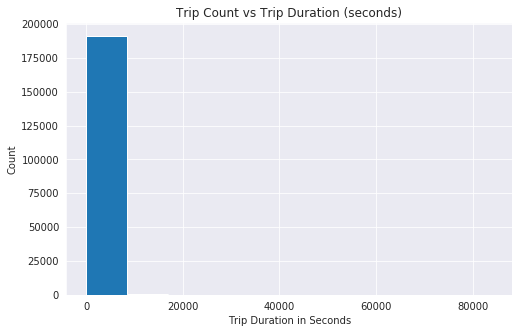

In [58]:
# set figure size 
plt.figure(figsize = (8, 5))

# set axis labels and title
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Count')
plt.title('Trip Count vs Trip Duration (seconds)')

# plot the data
plt.hist(data = df_clean, x = 'duration_sec');

For the x axis to span to 80000 seconds, there must be some outliers that aren't visible.

In [17]:
# for the sake of easier understanding, i will create a duration_min column
df_clean['duration_min'] = df_clean.duration_sec / 60

In [18]:
df_clean.duration_min.describe(percentiles=[.99])

count    191834.000000
mean         12.504311
std          27.835413
min           1.016667
50%           8.800000
99%          66.561167
max        1400.033333
Name: duration_min, dtype: float64

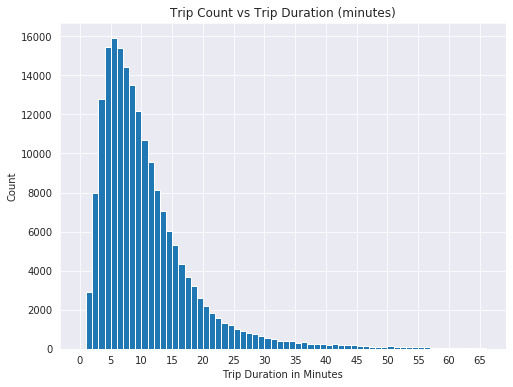

In [57]:
# set the size of the plot
plt.figure(figsize = (8, 6))

# set the bin size and x tick size
bins = np.arange(0, 67, 1)
ticks = np.arange(0, 67 , 5)

# set the x ticks
plt.xticks(ticks, ticks)
# set the axis labels and title
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Count')
plt.title('Trip Count vs Trip Duration (minutes)')

# plot the data
plt.hist(data = df_clean, x = 'duration_min', bins = bins);

We can see that 99% of the trips were less than one hour in duration.  Most the the trips fell between the 5 and 10 minute range.

In [20]:
# using the start_time, i can extract days and hours
df_clean['start_hourofday'] = df_clean.start_time.dt.hour
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%A')

In [21]:
# i'm just checking to see if it worked
df_clean.sample(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,start_hourofday,start_dayofweek
186322,376,2019-01-02 16:07:41.364,2019-01-02 16:13:57.849,50.0,2nd St at Townsend St,37.780526,-122.390288,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5018,Subscriber,No,6.266667,16,Wednesday


In [22]:
# i'm going to convert start_dayofweek to an ordered categorical datatype
day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
categorical_day = pd.api.types.CategoricalDtype(ordered = True, categories = day)
df_clean.start_dayofweek = df_clean.start_dayofweek.astype(categorical_day)

In [23]:
# checking if it worked
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
bike_share_for_all_trip            object
duration_min                      float64
start_hourofday                     int64
start_dayofweek                  category
dtype: object

Now I want to look at the distribution of trip on days of a week.

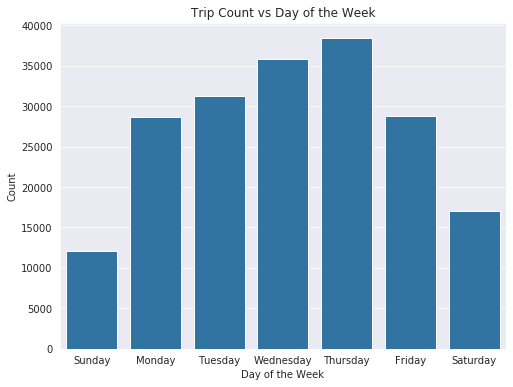

In [24]:
# set the size of the plot
plt.figure(figsize = (8, 6))

# set colors in the plot
base_color = sns.color_palette()[0]

# this is the plot
ax = sns.countplot(data = df_clean, x = 'start_dayofweek', color = base_color)

# set axis labels and title
ax.set(xlabel = 'Day of the Week', ylabel = 'Count', title = 'Trip Count vs Day of the Week')

# show the plot
plt.show()

We can see that Thursday has the most trips.  We can also see that more trips happen during the weekdays.  There are less trips happening during the weekend.  Maybe the hour trips happen is causing this?  Let's look at the distribution of trips over the hours in a day.

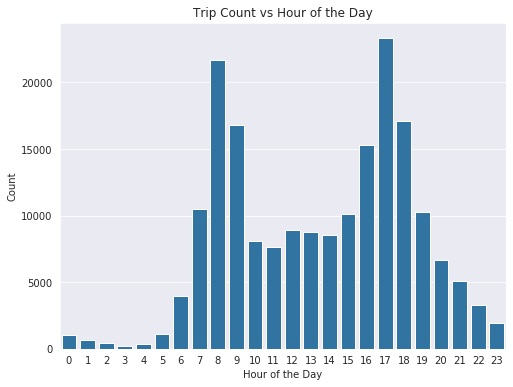

In [25]:
# set the figure size
plt.figure(figsize = (8, 6))

# this is the plot
ax = sns.countplot(data = df_clean, x = 'start_hourofday', color = base_color)

# set axis labels and title
ax.set(xlabel = 'Hour of the Day', ylabel = 'Count', title = 'Trip Count vs Hour of the Day')

# show the plot
plt.show()

We can see two peaks in the data.  The first peak is at 8 AM, and the second peak is at 5 PM.  It is possible that those trips are users commuting to work.  We can't say that for certain as we would need more personalized data, and we don't have that type of data since our dataset was anonymized to preserve privacy.  Though if it is really because of work commute, it would be in line with the *Trip Count vs Day of the Week* plot earlier.  Monday through Friday had more trips and those are the normal work days.

Subscriber    168561
Customer       23273
Name: user_type, dtype: int64


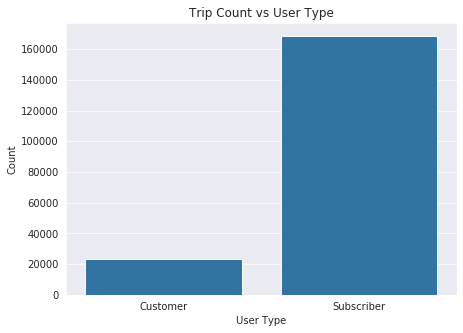

In [26]:
# i'm just seeing the values for the two bars
print(df_clean['user_type'].value_counts())

# set the figure size
plt.figure(figsize = (7,5))

# this is the plot
ax = sns.countplot(data = df_clean, x = 'user_type', color = base_color)

# set labels and title
ax.set(xlabel = 'User Type', ylabel = 'Count', title = 'Trip Count vs User Type')

# show the plot
plt.show()

We can see that there are more subscribers than there are customers.

No     175769
Yes     16065
Name: bike_share_for_all_trip, dtype: int64


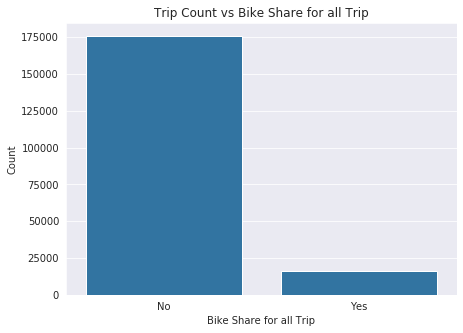

In [37]:
# looking at the value for the two bars
print(df_clean['bike_share_for_all_trip'].value_counts())

# set the figure size
plt.figure(figsize = (7,5))

# plot data
ax = sns.countplot(data = df_clean, x = 'bike_share_for_all_trip', color = base_color)

# set labels and title
ax.set(xlabel = 'Bike Share for all Trip', ylabel = 'Count', title = 'Trip Count vs Bike Share for all Trip')

plt.show()

Most users do not use the bike share service for their entire trip.

### Discuss the distribution(s) of your variable(s) of interest.  Were there any unusual points?  Did you need to perform any tranformations?

99% of user trips were under 67 minutes.  Most of the trips were quick and lasted between 5 to 10 minutes.  The maximum trip duration lasted for 1400 minutes which is about 23.3 hours (~23 hours 20 minutes).  That's almost an entire day!  The trip count is higher Mondays through Fridays.  Thursdays have the most trip count.  During the day, the trip count peaks at 8 AM and also peaks at 5 PM.

Looking at user types, there are more subscribers than there are customers, and most users do not use the bike share service for their entire trip.

### Of the features you investigated, were there any unusual distributions?  Did you perform any operations on the data to tidy, adjust, or change the form of the data?  If so, why did you do this?

The initial plotting of trip duration distribution was unusual.  After looking at .describe() with a 99th percentile, I was able to see where most of the data was.  Using the 99th percentile as the ceiling, I plotted another distribution which was a lot clearer than the first.

<a id='bi'></a>
## Bivariate Exploration

How does the trip count vary by day and hour?

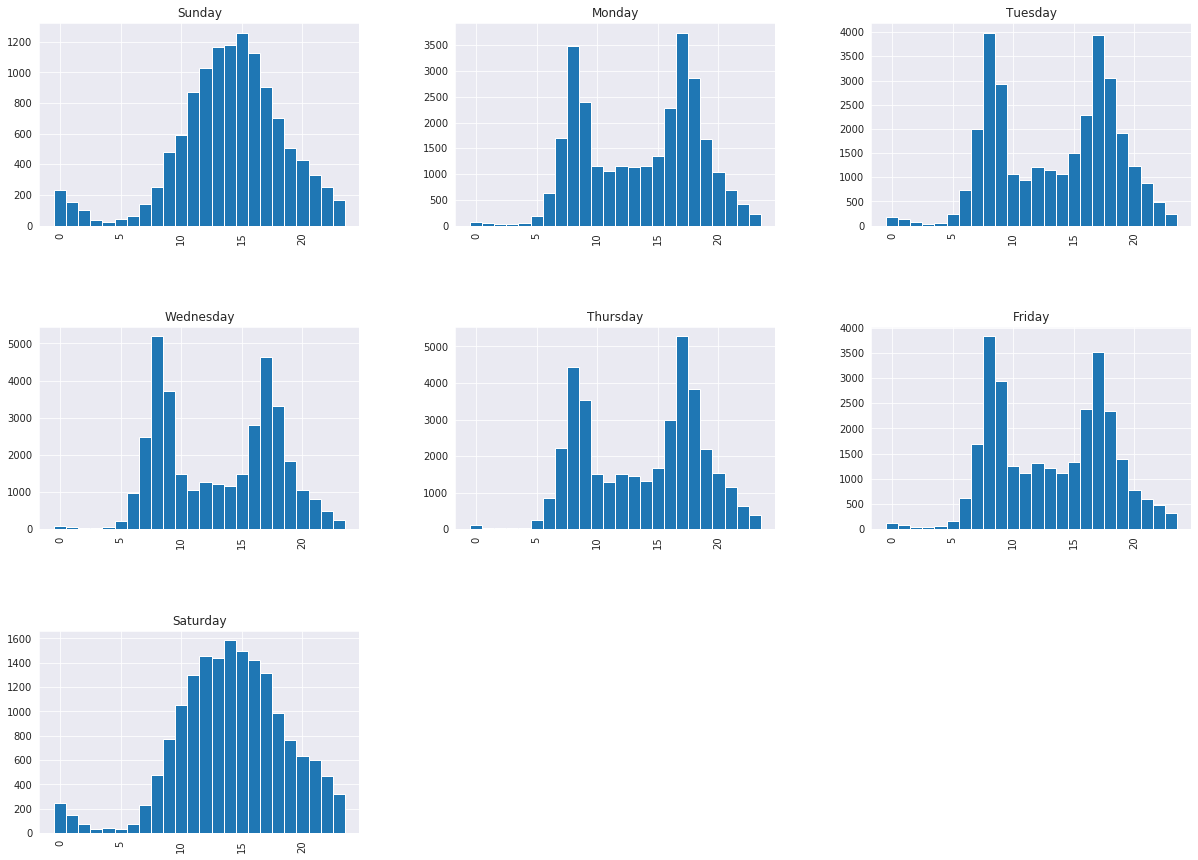

In [27]:
plt.rcParams["figure.figsize"] = [20,15]
bins24 = np.arange(25) - 0.5
df_clean.hist(column = 'start_hourofday', by = 'start_dayofweek', bins = bins24);

Trip Count by Day of the Week and Hour of the Day

After looking at *Trip Count vs Day of the Week* and *Trip Count vs Hour of the Day* plots, it made me think about plotting the number of trips on each day and hour.  The result is this plot.  Please first notice that the y-axis for each histogram is not the same scale.  I tried to find a way to set the same scale, but I failed to find a solution.  This plot shows histograms for each day.  Each day's trip count is distributed over the hour of the day.  For each day, we can see which time periods have higher trip counts.

On Sundays and Saturdays, we can see that the trip count is highest between 2-3 PM.  Mondays through Fridays, you can see two peaks.  The first peak is at 8 AM and the second peak is at 5 PM.  The two peak times match the two peak times in *Trip Count vs Hour of the Day*.  If it is not obvious, Mondays - Fridays have higher trip counts than Saturdays and Sundays.  The earlier *Trip Count vs Day of the Week* plot would support that.

How does the trip count vary by user type and hour of the day?

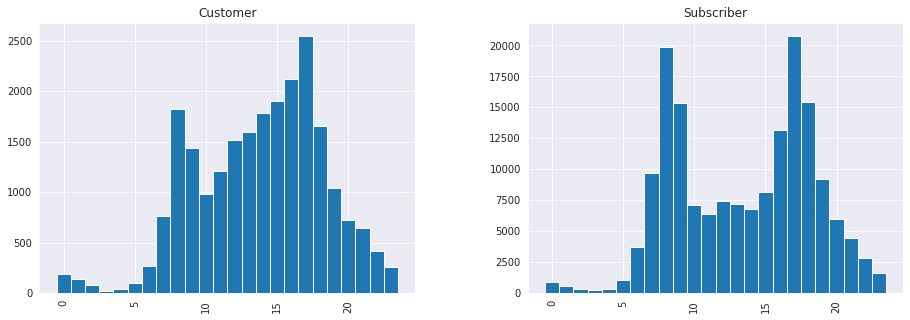

In [28]:
plt.rcParams["figure.figsize"] = [15,5]
df_clean.hist(column = 'start_hourofday', by = 'user_type', bins = bins24);

Trip Count by User Type and Hour of the Day



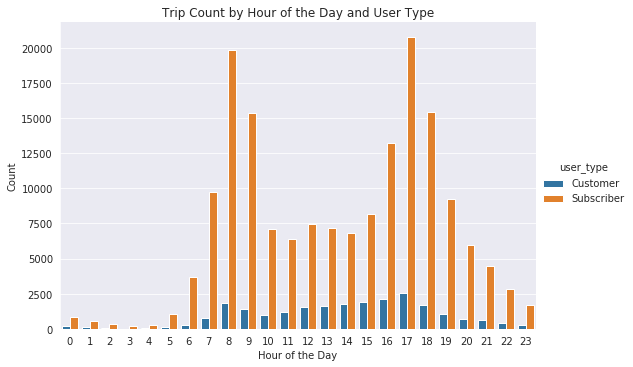

In [54]:
sns.catplot(data = df_clean, x = 'start_hourofday', kind = 'count', hue = 'user_type', height = 5, aspect = 1.5)
plt.title('Trip Count by Hour of the Day and User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Count');

So both of these plots show the same information, they are just presented differently.  Customers' trip count first peaks at 8 AM and peaks again at 5 PM.  Subscribers' trip count first peaks at 8 AM and peaks again at 5 PM.  The difference between the two user types is the scale of the plots.  That is illustrated in the second plot, which is the combined version.  The second plot takes into account the scale.  The Customer and Subscriber hours may peak at the same time, but you can see that there is a huge difference in the distribution of trip counts.

How does the trip count vary by day of the week and user type?

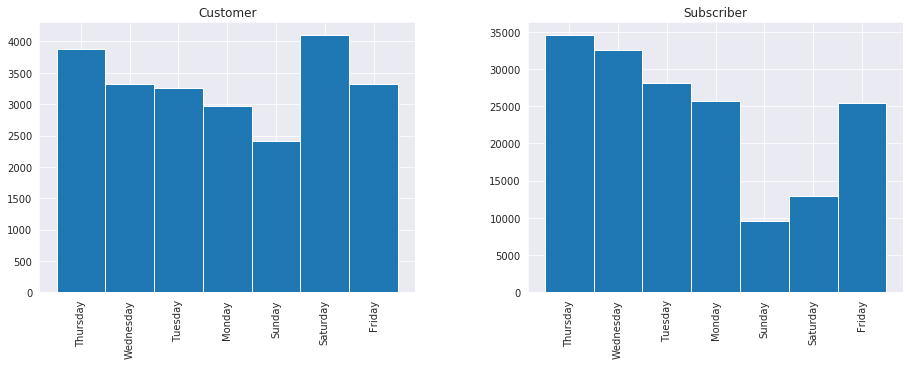

In [55]:
plt.rcParams["figure.figsize"] = [15,5]
df_clean.hist(column = 'start_dayofweek', by = 'user_type', bins = np.arange(8)-0.5);

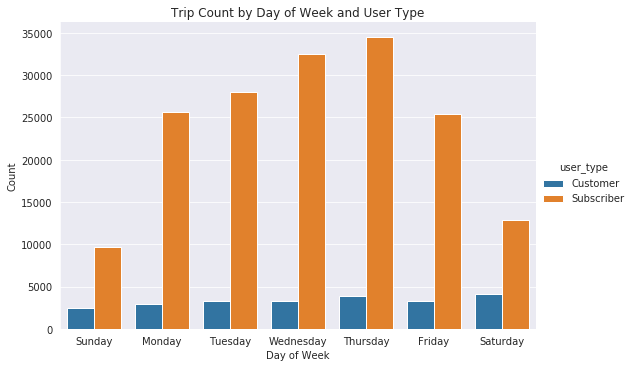

In [30]:
sns.catplot(data = df_clean, x = 'start_dayofweek', kind = 'count', hue = 'user_type', height = 5, aspect = 1.5)
plt.title('Trip Count by Day of Week and User Type')
plt.xlabel('Day of Week')
plt.ylabel('Count');

Similar to the earlier question, these 2 plots convey the same information just displayed differently.  The two plots show us the trip count broken down by day of the week and user type.  For subscribers their highest trip counts are on Thursdays, while the customers highest trip counts are on Saturdays.

How does the trip duration distribution vary between customers and subscribers?

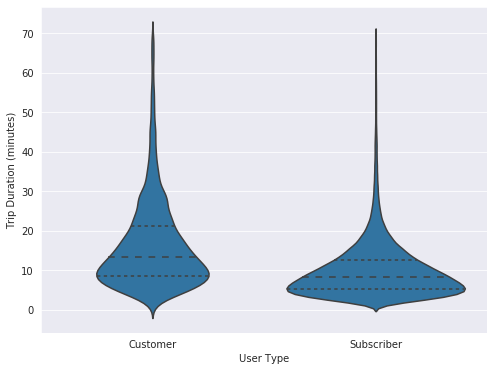

In [72]:
# remember that most of the data has duration_min less that 67 minutes
data = df_clean[df_clean['duration_min'] < 70]
plt.rcParams["figure.figsize"] = [8,6]

sns.violinplot(data = data, x = 'user_type', y = 'duration_min', color = base_color, inner = 'quartile')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)');

Subscribers generally take shorter rides than customers.  For subscribers, the widest part of the graph is around 5 minutes, while for customers, the widest part of the graph is around 9 minutes.

How does the trip duration vary between the days of the week?

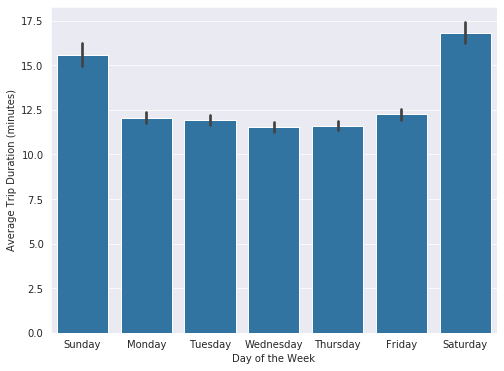

In [74]:
sns.barplot(data = df_clean, x = 'start_dayofweek', y = 'duration_min', color = base_color)
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)');

The trip durations are shorter Monday through Friday.  On the weekends, trips are longer.  Weekdays the trips last between 10-12.5 minutes, while on the weekends the trips last betwen 15-17.5 minutes.

### Talk about some of the relationships you observed in this part of the investigation.  How did the feature(s) of interest vary with other features in the dataset?

There are more users taking trips during weekdays than they are on weekends.  On weekends the trip count peaks between 2-3 PM.  On weekdays, the trip count peaks at 8 AM and 5 PM.  Breaking this information down to vary between user types, I found that both customers and subscribers trip counts peak at 8 AM and 5 PM.  The difference is that there are more subscribers than there are customers.

Lookin at the relationship between daily trip count and user type, it was shown that subscribers have high trip counts on Thursdays while customers have high trip counts on Saturdays.  Looking at the relationship between user type and trip duration, subscribers generally have shorter rides than customers.  Looking at the relationship between trip duration and day of the week, trip durations are shorter on weekdays than weekends.  On weekdays the trips last between 10-12.5 minutes, while one weekends the trips last betwee 15-17.5 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It is interesting to see that the subscribers' trip count is the highest on Thursday.

<a id='multi'></a>
## Multivariate Exploration

How does the trip duration vary in days between customers and subscribers?

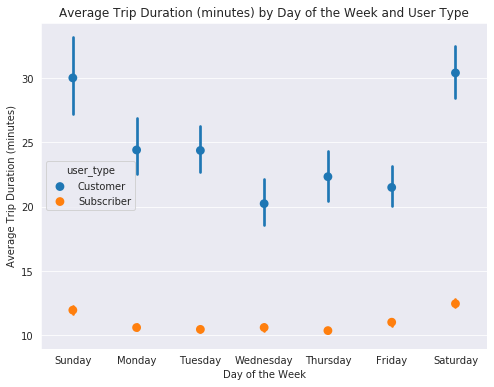

In [121]:
sns.pointplot(data = df_clean, x = 'start_dayofweek', y = 'duration_min', hue = 'user_type', linestyles = '')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Day of the Week and User Type');

Subscribers have much shorter trips than customers on each day.  Both user types have an increased trip duration on the weekends compared to the weekdays.  Subscribers have a consistent average trip duration during the weekdays.

How does the trip count vary by hour and day for the user types?

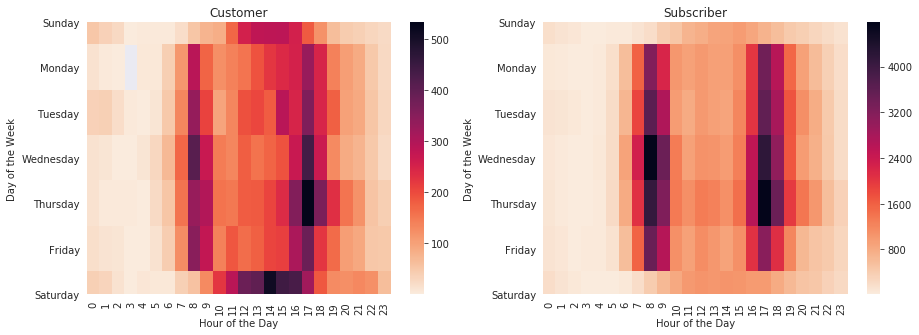

In [119]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
# separating customers and subscibers to different dataframes
cus = df_clean.query('user_type == "Customer"')
cus_counts = cus.groupby(['start_dayofweek', 'start_hourofday']).size()
cus_counts = cus_counts.reset_index(name = 'count')
cus_counts = cus_counts.pivot(index = 'start_dayofweek', columns = 'start_hourofday', values = 'count')
sns.heatmap(cus_counts, cmap = 'rocket_r')
plt.title('Customer')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week');

plt.subplot(1,2,2)
sub = df_clean.query('user_type == "Subscriber"')
sub_counts = sub.groupby(['start_dayofweek', 'start_hourofday']).size()
sub_counts = sub_counts.reset_index(name = 'count')
sub_counts = sub_counts.pivot(index = 'start_dayofweek', columns = 'start_hourofday', values = 'count')
sns.heatmap(sub_counts, cmap = 'rocket_r')
plt.title('Subscriber')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week');

The heatmaps show that customers use the bikeshare service heavily on the weekends.  Customers use the service the most on Saturdays at 2 PM.  They also use the service a lot on Thursday at 5 PM.  Subscribers use the service mostly during the weekdays at 8 AM and 5 PM.

### Talk about some of the relationships you observed in this part of the investigation.  Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part of the investigation, we found that subscribers have shorter trips than customers on a daily basis.  Both users have an increased trip duration on the weekends.  We also found that customers use the bikeshare service the most on Saturdays at 2 PM.  Subscribers use the service the most during weekdays around 8 AM and 5 PM.

The multivariate exploration strengthened some of the patterns found earlier in the univariate and bivariate explorations.  There are more subscribers than customers.  Subscribers use the bikes mostly during the weekdays and generally have shorter trips.  Customers use the bikes mostly during the weekends and have longer trips than subscribers.

### Were there any interesting or surprising interactions between features?

There were no surprising interactions between features.